# Multi-task Modelling

In this tutorial, we will show how to train a multi-task model with QSPRpred that predicts affinity for the four human adenosine receptors (A1, A2A, A2B, A3).

Here we will load the `AR_LIGANDS.tsv` file that contains the ligands for the four receptors. 
However, the activities are all in the same column, so we will need to split them into four columns, one for each receptor.

In [1]:
import os

import pandas as pd

# load the data
df = pd.read_csv('../../tutorial_data/AR_LIGANDS.tsv', sep='\t')

display(df.head())

# pivot the dataframe to have the accession as columns
df = df.pivot(index="SMILES", columns="accession", values="pchembl_value_Mean")
df.columns.name = None
df.reset_index(inplace=True)

display(df.head())

,SMILES,pchembl_value_Mean,accession
0,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,8.68,P29274
1,Cc1nn(-c2cc(NC(=O)CCN(C)C)nc(-c3ccc(C)o3)n2)c(...,6.68,P30542
2,Nc1c(C(=O)Nc2ccc([N+](=O)[O-])cc2)sc2c1cc1CCCC...,4.82,P29274
3,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,7.15,P0DMS8
4,O=C(Nc1nc2ncccc2n2c(=O)n(-c3ccccc3)nc12)c1ccccc1,5.65,P29274


,SMILES,P0DMS8,P29274,P29275,P30542
0,Brc1cc(Nc2nc3c(ncnc3N3CCCC3)s2)ccc1,5.89,6.61,NaN,NaN
1,C#CCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)C...,7.63,5.36,NaN,NaN
2,C#CCCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)...,7.53,5.15,NaN,NaN
3,C#CCCCCC(=O)NCCNC(=O)COc1ccc(CCCn2ncc3c2nc(N)n...,5.89,7.12,NaN,5.96
4,C#CCCCCCNC(=O)Nc1nc2nn(C)cc2c2nc(-c3ccco3)nn12,7.89,6.32,NaN,NaN


Now that we have our data in the right format, we can create the multi-task `QSPRDataset`.
The main difference here is the specification of multi-task, which is done by having a list of target properties instead of a single one.
Note, that we specify each property here as a regression task, which makes this model a multi-task regression model. It is also possible to specify all classification tasks or a mix of classification and regression tasks. However, there are currently no build-in models that support mixed tasks. See the [custom model tutorial](custom_model.ipynb) for more information on how to implement a custom model.

Furthermore, as you may have noticed, there are a lot of missing values in the data. Therefore, we will use a mean imputation from scikit-learn here, to fill in the missing values.

In [2]:
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer

target_props = [
    {"name": "P0DMS8", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")},
    {"name": "P29274", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")},
    {"name": "P29275", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")},
    {"name": "P30542", "task": "REGRESSION", "imputer": SimpleImputer(strategy="mean")}]

dataset = QSPRDataset(
    name="MultiTaskTutorialDataset",
    df=df,
    target_props=target_props,
    store_dir="../../tutorial_output/data",
    random_state=42,
)

dataset.getDF()

,SMILES,P0DMS8,P29274,P29275,P30542,QSPRID,P0DMS8_original,P0DMS8_before_impute,P29274_original,P29274_before_impute,P29275_original,P29275_before_impute,P30542_original,P30542_before_impute
QSPRID,,,,,,,,,,,,,,
MultiTaskTutorialDataset_0000,Brc1cc(Nc2nc3c(ncnc3N3CCCC3)s2)ccc1,5.89,6.610000,7.077226,6.610345,MultiTaskTutorialDataset_0000,5.89,5.89,6.61,6.61,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_0001,C#CCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)C...,7.63,5.360000,7.077226,6.610345,MultiTaskTutorialDataset_0001,7.63,7.63,5.36,5.36,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_0002,C#CCCCCC#Cc1nc(NCc2cc(Cl)ccc2)c2ncn(C3C(O)C(O)...,7.53,5.150000,7.077226,6.610345,MultiTaskTutorialDataset_0002,7.53,7.53,5.15,5.15,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_0003,C#CCCCCC(=O)NCCNC(=O)COc1ccc(CCCn2ncc3c2nc(N)n...,5.89,7.120000,7.077226,5.960000,MultiTaskTutorialDataset_0003,5.89,5.89,7.12,7.12,NaN,NaN,5.96,5.96
MultiTaskTutorialDataset_0004,C#CCCCCCNC(=O)Nc1nc2nn(C)cc2c2nc(-c3ccco3)nn12,7.89,6.320000,7.077226,6.610345,MultiTaskTutorialDataset_0004,7.89,7.89,6.32,6.32,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MultiTaskTutorialDataset_6792,c1nc2c(nc(Nc3ccc(N4CCOCC4)cc3)nc2NC2CCC2)[nH]1,5.74,6.894782,7.077226,6.610345,MultiTaskTutorialDataset_6792,5.74,5.74,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_6793,c1nc2c(nc(Nc3ccc(N4CCOCC4)cc3)nc2NC2CCCC2)[nH]1,5.86,6.894782,7.077226,6.610345,MultiTaskTutorialDataset_6793,5.86,5.86,NaN,NaN,NaN,NaN,NaN,NaN
MultiTaskTutorialDataset_6794,c1nc2c(nc(Nc3ccc(N4CCOCC4)cc3)nc2NC2CCCCC2)[nH]1,6.18,6.894782,7.077226,6.610345,MultiTaskTutorialDataset_6794,6.18,6.18,NaN,NaN,NaN,NaN,NaN,NaN


Feature calculation and dataset preparation is the same as for single task models. During splitting compounds are assigned to the training or test set (not individual datapoints).

In [3]:
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data import RandomSplit

# calculate compound features and split dataset into train and test
dataset.prepareDataset(
    split=RandomSplit(test_fraction=0.2, dataset=dataset),
    feature_calculators=[MorganFP(radius=3, nBits=2048)]
)

print(f"Number of samples train set: {len(dataset.y)}")
print(f"Number of samples test set: {len(dataset.y_ind)}")

dataset.save()

Number of samples train set: 5437
Number of samples test set: 1360


### Training the model
We use a KNN model because it is relatively fast. 

In [4]:
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from qsprpred.models import CrossValAssessor, TestSetAssessor

os.makedirs('../../tutorial_output/models', exist_ok=True)

# This is an SKlearn model, so we will initialize it with the SklearnModel class
model = SklearnModel(
    base_dir='../../tutorial_output/models',
    alg=KNeighborsRegressor,
    name='MultiTaskTutorialModel')

CrossValAssessor('r2')(model, dataset)
TestSetAssessor('r2')(model, dataset)

# Finally, we need to fit the model on the complete dataset if we want to use it further
model.fitDataset(dataset)

# and save the model
model.save()

/home/helle/.conda/envs/qsprpred/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/zfsdata/data/helle/01_MainProjects/03_QSPRpred/Scripts/QSPRpred/tutorials/tutorial_output/models/MultiTaskTutorialModel/MultiTaskTutorialModel_meta.json'

### Model evaluation
Here we show how to calculate some metrics. Currently, imputed values are included in this analysis, the option to remove these from the analysis will be added soon.

In [5]:
import pandas as pd
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, r2_score

# get independent test set
df = pd.read_table(
    "../../tutorial_output/models/MultiTaskTutorialModel/MultiTaskTutorialModel.ind.tsv")

# column names containing original labels or predictions for the tasks
label_names = [i for i in list(df.columns.values) if "Label" in i]
pred_names = [i for i in list(df.columns.values) if "Prediction" in i]

# turn into np array
ylabel = df[label_names].to_numpy()
ypred = df[pred_names].to_numpy()

# get metrics
summary = {}
for metric in [explained_variance_score, mean_absolute_error, mean_squared_error,
               r2_score]:
    score = metric(ylabel, ypred)
    summary[metric.__name__] = score

summary["ModelName"] = model.name

summary

{'explained_variance_score': 0.45914357606291,
 'mean_absolute_error': 0.33895315625,
 'mean_squared_error': 0.30420330705990806,
 'r2_score': 0.4588969185176987,
 'ModelName': 'MultiTaskTutorialModel'}

Now we can plot the results for each task, this plot shows the predicted vs. the true values for each task. There is currently no option to directly plot this with QSPRpred, but below you can find the code how to make this plot with matplotlib, from the saved assessment files (MultiTaskTutorialModel.cv.tsv and MultiTaskTutorialModel.ind.tsv).

MultiTaskTutorialModel


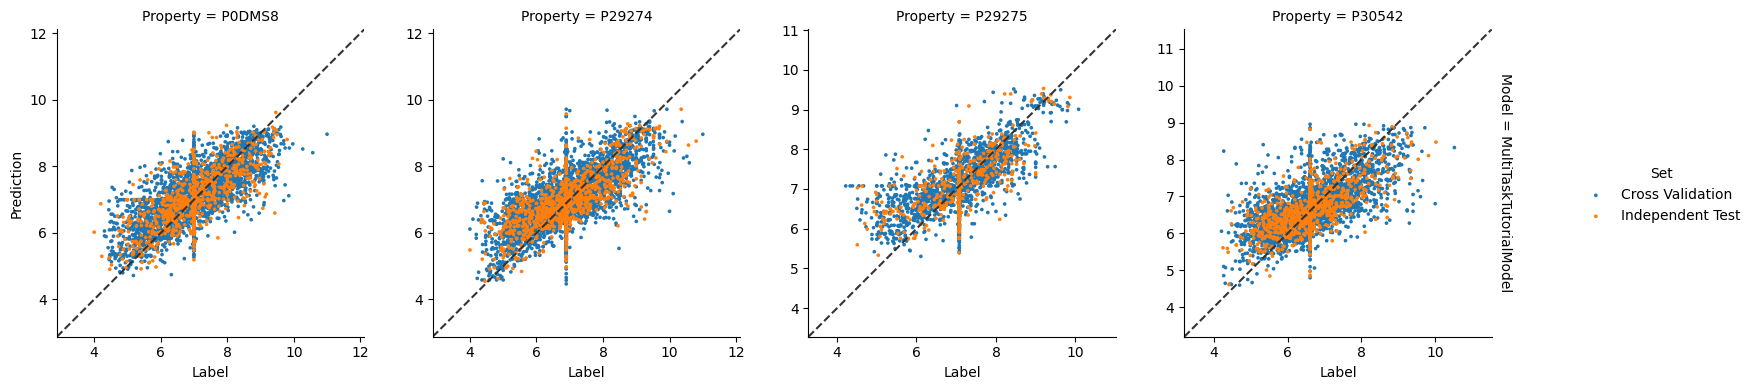

                     Model              Fold Property        R2      RMSE  \
0   MultiTaskTutorialModel               0.0   P0DMS8  0.473236  0.337764   
1   MultiTaskTutorialModel               0.0   P29274  0.503804  0.427789   
2   MultiTaskTutorialModel               0.0   P29275  0.493783  0.142325   
3   MultiTaskTutorialModel               0.0   P30542  0.347060  0.335524   
4   MultiTaskTutorialModel               1.0   P0DMS8  0.565705  0.310630   
5   MultiTaskTutorialModel               1.0   P29274  0.478699  0.395758   
6   MultiTaskTutorialModel               1.0   P29275  0.387734  0.188790   
7   MultiTaskTutorialModel               1.0   P30542  0.371193  0.341298   
8   MultiTaskTutorialModel               2.0   P0DMS8  0.533801  0.326882   
9   MultiTaskTutorialModel               2.0   P29274  0.465220  0.428645   
10  MultiTaskTutorialModel               2.0   P29275  0.453697  0.146470   
11  MultiTaskTutorialModel               2.0   P30542  0.423752  0.346828   

<Figure size 640x480 with 0 Axes>

In [6]:
from qsprpred.plotting.regression import CorrelationPlot

plot = CorrelationPlot([model])
axes, summary = plot.make(save=False, show=True)
print(summary)